# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** — настроить корректные параметры объявлений для:
1. автоматизации системы объявлений
2. удаления или блокировки объявлений с анамальными значениями
3. поиска мошеннических предложений

**Ход исследования**

Данные архима объявлений получены из файла `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед работой с параметрами понадобится обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки или пропуски в данных.
 
Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление в таблицу новых столбцов с параметрами.
 4. Проведение исследовательского анализа данных.
 5. Общий вывод.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

data = pd.read_csv('/datasets/real_estate_data.csv', index_col=0, sep='\t')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 20 to 4
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23699 non-null  float64       
 1   total_area            23699 non-null  float64       
 2   first_day_exposition  23699 non-null  datetime64[ns]
 3   rooms                 23699 non-null  int64         
 4   ceiling_height        14504 non-null  float64       
 5   floors_total          23613 non-null  float64       
 6   living_area           21796 non-null  float64       
 7   floor                 23699 non-null  int64         
 8   is_apartment          2775 non-null   object        
 9   studio                23699 non-null  bool          
 10  open_plan             23699 non-null  bool          
 11  kitchen_area          21421 non-null  float64       
 12  balcony               12180 non-null  float64       
 13  locality_name      

In [3]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)o

In [4]:
display(data)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,,,,,,,,,,,,,,,,,,,,,
20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построили гистограммы по всем столбцам

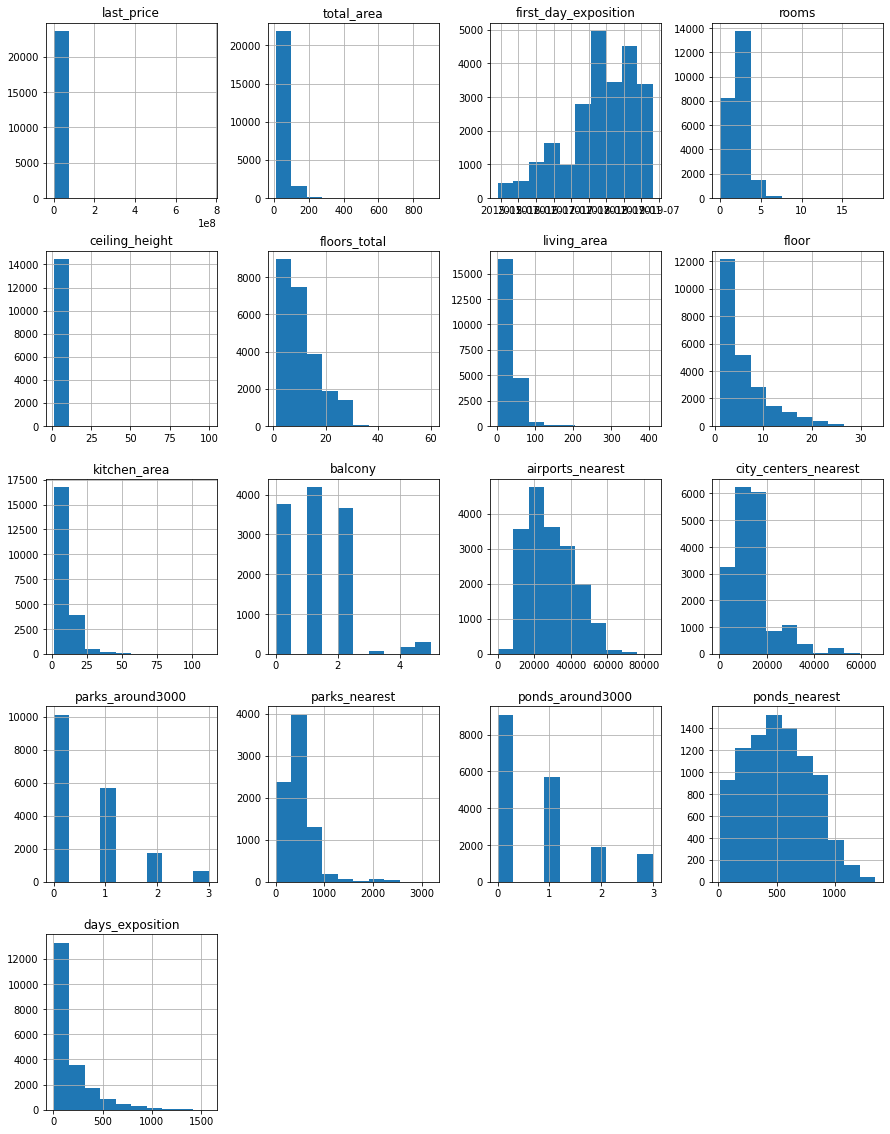

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Нашли и изучили пропущенные значения в столбцах.

In [6]:
data.isna().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000
studio,0.000000


In [8]:
# проверяем на наличие дупликатов
data.duplicated().sum()

0

Заменяем очевидные пропуски на 0.

In [9]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data.isna().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# удаляем строки без названия населенных пунктов
data = data.dropna(subset=['locality_name']) 

In [11]:
data.isna().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [12]:
# заменяем оставшие пропуски медианным значением    
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
    warnings.filterwarnings('ignore')
data['ceiling_height'].isna().sum() 

for locality_name in data['ceiling_height'].isna():
    data.loc[(data['ceiling_height'].isna()), 'ceiling_height'] = data['ceiling_height'].median()
    warnings.filterwarnings('ignore')
data['ceiling_height'].isna().sum()

0

In [13]:
# заменяем пропуски медианным значением
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'floors_total'].median()
    data.loc[(data['floors_total'].isna()) & (data['locality_name'] == locality_name), 'floors_total'] = median
    warnings.filterwarnings('ignore')
for floors in data['floors_total'].isna():
    data.loc[(data['floors_total'].isna()), 'floors_total'] = data['floors_total'].median()
    warnings.filterwarnings('ignore')
    
data['floors_total'].isna().sum() 

0

In [14]:
 # заменяем пропуски медианным значением
for room in data['rooms'].unique():
    median = data.loc[data['rooms'] == room, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == room), 'living_area'] = median
    warnings.filterwarnings('ignore')
for living_area in data['living_area'].isna():
    data.loc[(data['living_area'].isna()), 'living_area'] = data['living_area'].median() 
    warnings.filterwarnings('ignore')
    
data['living_area'].isna().sum() 

0

In [15]:
 # заменяем пропуски медианным значением
for living_area in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == living_area, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['locality_name'] == living_area), 'kitchen_area'] = median
    warnings.filterwarnings('ignore')

for living_area in data['kitchen_area'].isna():
    data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = data['kitchen_area'].median()
    warnings.filterwarnings('ignore')
    
data['kitchen_area'].isna().sum() 

0

In [16]:
 # заменяем пропуски медианным значением
for living_area in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == living_area, 'parks_nearest'].median()
    data.loc[(data['parks_nearest'].isna()) & (data['locality_name'] == living_area), 'parks_nearest'] = median
    warnings.filterwarnings('ignore')
for living_area in data['parks_nearest'].isna():
    data.loc[(data['parks_nearest'].isna()), 'parks_nearest'] = data['parks_nearest'].median()
    warnings.filterwarnings('ignore')
    
data['parks_nearest'].isna().sum()    

0

In [17]:
# заменяем пропуски медианным значением
for living_area in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == living_area, 'ponds_nearest'].median()
    data.loc[(data['ponds_nearest'].isna()) & (data['locality_name'] == living_area), 'ponds_nearest'] = median
    warnings.filterwarnings('ignore')
    
for living_area in data['ponds_nearest'].isna():
    data.loc[(data['ponds_nearest'].isna()), 'ponds_nearest'] = data['ponds_nearest'].median()
    warnings.filterwarnings('ignore')

data['ponds_nearest'].isna().sum()        

0

In [18]:
# заменяем пропуски медианным значением
for living_area in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == living_area, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == living_area), 'airports_nearest'] = median
    warnings.filterwarnings('ignore')

for living_area in data['airports_nearest'].isna():
    data.loc[(data['airports_nearest'].isna()), 'airports_nearest'] = data['airports_nearest'].median()
    warnings.filterwarnings('ignore')
data['airports_nearest'].isna().sum()  

0

In [19]:
 # заменяем пропуски медианным значением

for living_area in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == living_area, 'city_centers_nearest'].median()
    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == living_area), 'city_centers_nearest'] = median
    warnings.filterwarnings('ignore')

for living_area in data['city_centers_nearest'].isna():
    data.loc[(data['city_centers_nearest'].isna()), 'city_centers_nearest'] = data['city_centers_nearest'].median()

data['city_centers_nearest'].isna().sum()

0

In [20]:
# оставляем пропуски только в столбце с количеством дней от публикации до снятия
data.isna().sum()

last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

Возможные причины возникновения пропусков:

Продавцы намеренно не указывают некоторые параметры, чтобы расширить охват возможных покупателей, или просто не считают их важными. Но значения в столбцах 'locality_name' и 'living_area', скорее всего, являются обязательными параметрами, поэтому эти пропуски могли быть пропущены при записи данных. Значения 'days_exposition' генерируются автоматически.

#### Рассмотрели типы данных в каждом столбце.

Типы данных до редактирования:

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 20 to 4
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23650 non-null  float64       
 1   total_area            23650 non-null  float64       
 2   first_day_exposition  23650 non-null  datetime64[ns]
 3   rooms                 23650 non-null  int64         
 4   ceiling_height        23650 non-null  float64       
 5   floors_total          23650 non-null  float64       
 6   living_area           23650 non-null  float64       
 7   floor                 23650 non-null  int64         
 8   is_apartment          23650 non-null  object        
 9   studio                23650 non-null  bool          
 10  open_plan             23650 non-null  bool          
 11  kitchen_area          23650 non-null  float64       
 12  balcony               23650 non-null  float64       
 13  locality_name      

Редактируем типы данных.

In [22]:
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
#data['days_exposition'] = data['days_exposition'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 20 to 4
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23650 non-null  int64         
 1   total_area            23650 non-null  float64       
 2   first_day_exposition  23650 non-null  datetime64[ns]
 3   rooms                 23650 non-null  int64         
 4   ceiling_height        23650 non-null  float64       
 5   floors_total          23650 non-null  int64         
 6   living_area           23650 non-null  float64       
 7   floor                 23650 non-null  int64         
 8   is_apartment          23650 non-null  int64         
 9   studio                23650 non-null  bool          
 10  open_plan             23650 non-null  bool          
 11  kitchen_area          23650 non-null  float64       
 12  balcony               23650 non-null  int64         
 13  locality_name      

Небходимо изменить тип данных для того, чтобы можно было использовать различные функции (среднее, медиана, количество).


#### Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты.

In [23]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Дубликаты:
Кудрово, Любань, Мурино, Никольское.

In [24]:
#переименовываем дубликаты
data['locality_name'] = data['locality_name'].replace('Кудрово', 'деревня Кудрово')
data['locality_name'] = data['locality_name'].replace('Любань', 'поселок Любань')
data['locality_name'] = data['locality_name'].replace('Мурино', 'поселок Мурино')
data['locality_name'] = data['locality_name'].replace('Никольское', 'село Никольское')
#проверяем
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Советский',
       'городской посёлок Фёдоровское', 'горо

#### Ищем и устраняем редкие и выбивающиеся значения. 

In [25]:
data.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,20470.000000
mean,6.541127e+06,60.329069,2.070106,2.733775,10.672262,34.313891,5.893277,0.002114,10.465108,0.591712,28391.631882,13980.667907,0.469091,471.910740,0.590359,507.918774,180.753200
std,1.089640e+07,35.661808,1.078620,1.010372,6.585538,21.709506,4.883317,0.045932,5.631948,0.959662,11178.253663,7593.826714,0.748458,203.705838,0.883539,175.571339,219.777916
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.400000,2.000000,0.000000,7.200000,0.000000,21160.000000,10939.000000,0.000000,460.000000,0.000000,503.000000,45.000000
50%,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.300000,4.000000,0.000000,9.600000,0.000000,26757.000000,13107.000000,0.000000,460.000000,0.000000,503.000000,95.000000
75%,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,0.000000,11.457500,1.000000,34509.000000,15318.750000,1.000000,460.000000,1.000000,503.000000,231.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,1.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [26]:
data['last_price'].sort_values().unique()

array([    12190,    430000,    440000, ..., 401300000, 420000000,
       763000000])

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

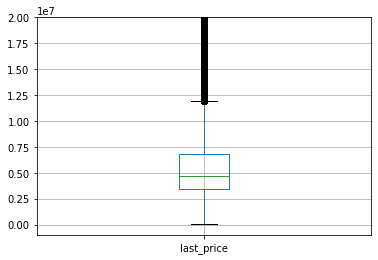

In [27]:
data.boxplot(column =['last_price'])
plt.ylim(-1000000, 20000000)
data['last_price'].describe()

<AxesSubplot:>

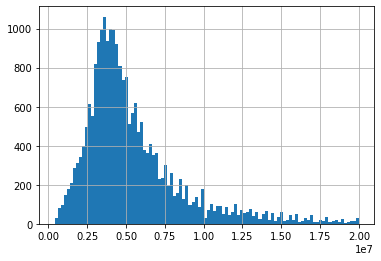

In [28]:
data['last_price'].hist(bins=100, range=(400000, 20000000))

21791

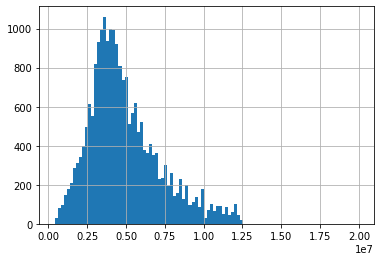

In [29]:
#удаляем анамалии
data = data[data['last_price'] < 12500000]
data = data[data['last_price'] > 13000]
#проверяем
data['last_price'].hist(bins=100, range=(400000, 20000000))
len(data['last_price'])

In [30]:
#смотрим диапозон значений
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 201.5, 206. , 230. ])

count    21791.000000
mean        53.644294
std         19.562401
min         12.000000
25%         39.000000
50%         49.850000
75%         64.000000
max        230.000000
Name: total_area, dtype: float64

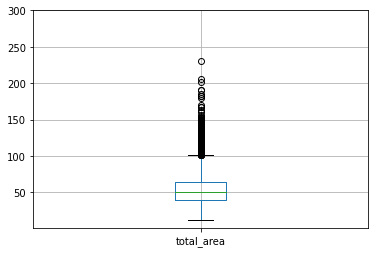

In [31]:
data.boxplot(column =['total_area'])
plt.ylim(1, 300)
data['total_area'].describe()

21262

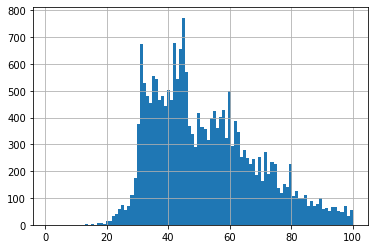

In [32]:
#удаляем анамалии
data = data[data['total_area'] <=100]
#проверяем
data['total_area'].hist(bins=100, range=(1, 100))
len(data['total_area'])

In [33]:
#смотим диапозон значений
data['rooms'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

count    21262.000000
mean         1.892672
std          0.867906
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

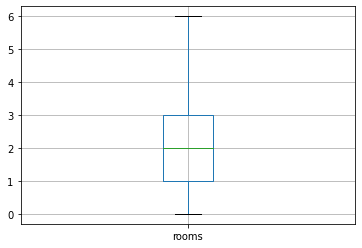

In [34]:
data.boxplot(column =['rooms'])
data['rooms'].describe()
#все ОК.

count    21262.000000
mean         2.704215
std          0.818161
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

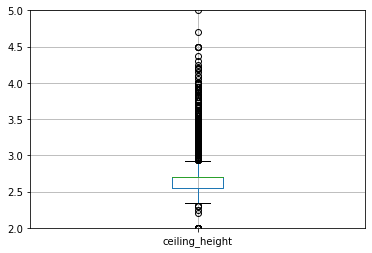

In [35]:
data.boxplot(column =['ceiling_height'])
plt.ylim(2, 5)
data['ceiling_height'].describe()

In [36]:
data = data[data['ceiling_height'] <= 4]
len(data['ceiling_height'])

21210

In [37]:
data['floors_total'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 34, 35, 36, 37, 52,
       60])

count    21210.000000
mean        10.813107
std          6.624078
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

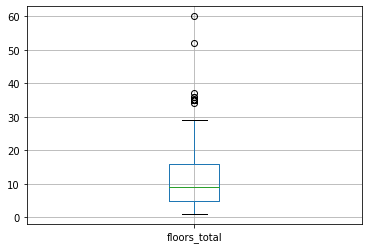

In [38]:
data.boxplot(column =['floors_total'])
#plt.ylim(1, 60)
data['floors_total'].describe()

In [39]:
data = data[data['floors_total'] <= 30]
len(data['floors_total'])

21182

In [40]:
data['living_area'].sort_values().unique()
#подозрительные значения 2, 3, 5

array([ 2.      ,  3.      ,  5.      , ..., 88.      , 89.100006,
       91.785   ])

count    21182.000000
mean        29.758978
std         12.194746
min          2.000000
25%         18.000000
50%         29.000000
75%         38.700000
max         91.785000
Name: living_area, dtype: float64

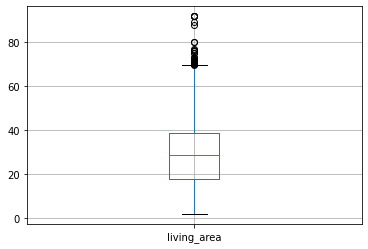

In [41]:
data.boxplot(column =['living_area'])
#plt.ylim(1, 100)
data['living_area'].describe()

21152

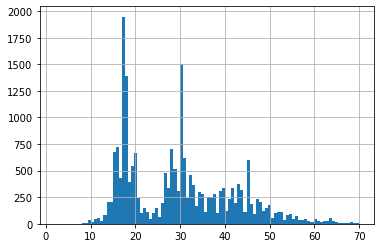

In [42]:
#удаляем анамалии
data = data[data['living_area'] <= 70]
#проверяем
data['living_area'].hist(bins=100)
len(data)

In [43]:
data['floor'].sort_values().unique()
#выглядит нормально

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

count    21152.000000
mean         5.907621
std          4.889346
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

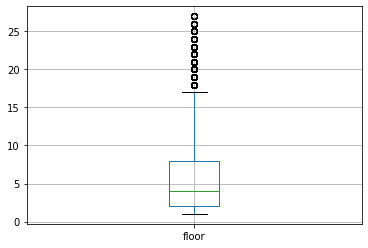

In [44]:
data.boxplot(column =['floor'])
#plt.ylim(1, 27)
data['floor'].describe()

count    20340.000000
mean         5.308309
std          3.909591
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         17.000000
Name: floor, dtype: float64

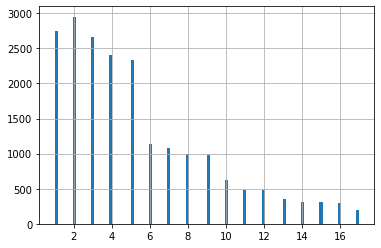

In [45]:
#удаляем анамалии
data = data[data['floor'] <= 17]
#проверяем
data['floor'].hist(bins=100)
data['floor'].describe()

In [46]:
data['is_apartment'].sort_values().unique()
#все ОК.

array([0, 1])

count    20340.000000
mean         9.427930
std          3.521659
min          1.300000
25%          7.000000
50%          9.000000
75%         10.700000
max         50.000000
Name: kitchen_area, dtype: float64

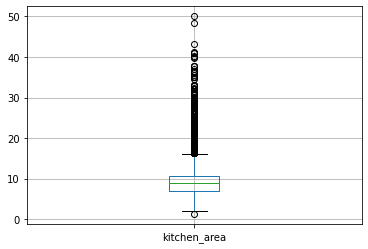

In [47]:
#data['kitchen_area'].sort_values().unique()
#рассмотрим по-подробнее
data.boxplot(column =['kitchen_area'])
#plt.ylim(1, 50)
data['kitchen_area'].describe()

count    20006.000000
mean         9.184814
std          2.832315
min          4.000000
25%          7.000000
50%          9.000000
75%         10.600000
max         20.000000
Name: kitchen_area, dtype: float64

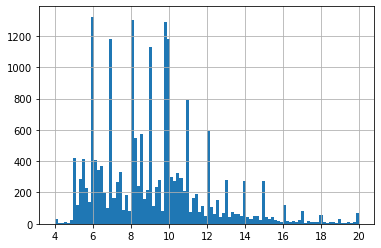

In [48]:
#удаляем анамалии
data = data[data['kitchen_area'] <= 20]
data = data[data['kitchen_area'] >= 4]
#проверяем
data['kitchen_area'].hist(bins=100)
data['kitchen_area'].describe()

In [49]:
data['airports_nearest'].sort_values().unique()
# 0 метров от аэропорта - подозрительно, не так ли?

array([    0,  6450,  6914, ..., 84665, 84853, 84869])

count    20006.000000
mean     28393.246226
std      11276.388716
min          0.000000
25%      20810.000000
50%      26757.000000
75%      34515.250000
max      84869.000000
Name: airports_nearest, dtype: float64

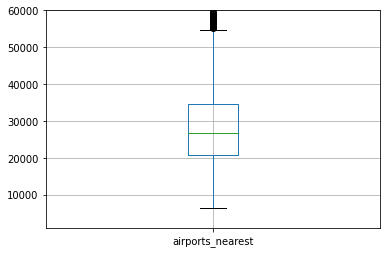

In [50]:
#рассмотрим по-подробнее
data.boxplot(column =['airports_nearest'])
plt.ylim(1000, 60000)
data['airports_nearest'].describe()

count    19826.000000
mean     28049.674619
std      10711.390371
min       6450.000000
25%      20644.000000
50%      26757.000000
75%      34109.000000
max      59705.000000
Name: airports_nearest, dtype: float64

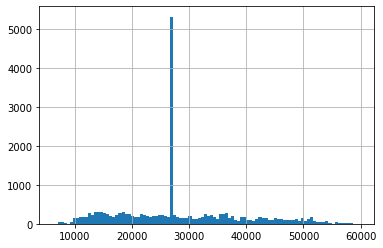

In [51]:
#удаляем анамалии
data = data[data['airports_nearest'] <= 60000]
data = data[data['airports_nearest'] != 0]
#проверяем
data['airports_nearest'].hist(bins=100)
data['airports_nearest'].describe()

In [52]:
data['city_centers_nearest'].sort_values().unique()
#все ОК.

array([  208,   215,   329, ..., 53294, 60223, 61495])

count    19826.000000
mean     14350.102139
std       6923.245252
min        208.000000
25%      11753.000000
50%      13107.000000
75%      15425.500000
max      61495.000000
Name: city_centers_nearest, dtype: float64

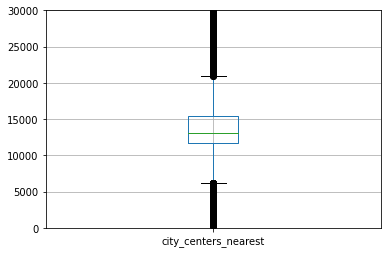

In [53]:
#рассмотрим по-подробнее
data.boxplot(column =['city_centers_nearest'])
plt.ylim(0, 30000)
data['city_centers_nearest'].describe()

count    18161.000000
mean     12675.206266
std       3894.279107
min        208.000000
25%      11468.000000
50%      13107.000000
75%      14516.000000
max      24972.000000
Name: city_centers_nearest, dtype: float64

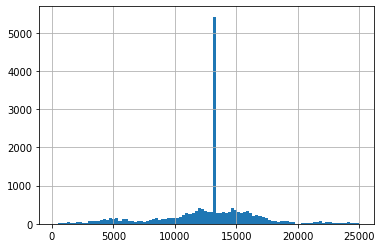

In [54]:
#удаляем анамалии
data = data[data['city_centers_nearest'] <= 25000]
data = data[data['city_centers_nearest'] != 0]
#проверяем
data['city_centers_nearest'].hist(bins=100)
data['city_centers_nearest'].describe()

In [55]:
data['parks_around3000'].sort_values().unique()
#все ОК.

array([0, 1, 2, 3])

count    18161.000000
mean       474.709542
std        186.086007
min          1.000000
25%        460.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

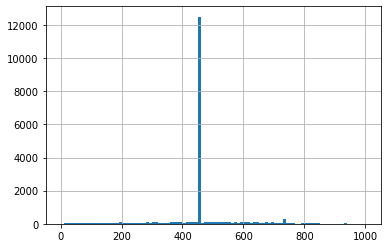

In [56]:
data['parks_nearest'].hist(bins=100, range=(1,1000))
data['parks_nearest'].describe()
# более 60% пропусков были заполнены медианой, поэтому сложно определить анамалии

In [57]:
data['ponds_around3000'].sort_values().unique()
#все ОК.`

array([0, 1, 2, 3])

In [58]:
data['ponds_nearest'].sort_values().unique()
#все Ок.

array([  13,   16,   19, ..., 1337, 1341, 1344])

count    18161.000000
mean       516.621221
std        164.499843
min         13.000000
25%        503.000000
50%        503.000000
75%        503.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

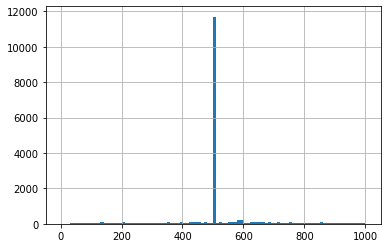

In [59]:
data['ponds_nearest'].hist(bins=100, range=(1,1000))
data['ponds_nearest'].describe()
# более 60% пропусков были заполнены медианой, поэтому сложно определить анамалии

count    15914.000000
mean       169.766558
std        208.686507
min          1.000000
25%         43.000000
50%         90.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

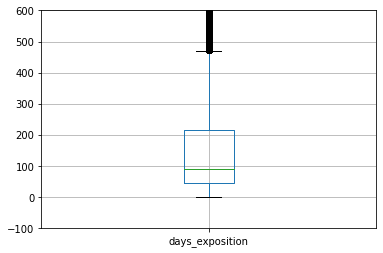

In [60]:
#рассмотрим 
data.boxplot(column =['days_exposition'])
plt.ylim(-100, 600)
data['days_exposition'].describe()
#больше 10% данных нет, при применении фильтра теряется большое количество данных

In [61]:
display(data)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,,,,,,,,,,,,,,,,,,,,,
7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,0,False,...,11.00,2,посёлок Шушары,12817,18603,0,460,0,584,81.0
10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,0,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0
10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,0,False,...,9.10,0,городской посёлок Янино-1,26757,13107,0,460,0,503,55.0
6,3700000,37.3,2017-11-02,1,2.64,26,10.6,6,0,False,...,14.40,1,посёлок Парголово,52996,19143,0,733,0,593,155.0
18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,0,False,...,6.50,2,Санкт-Петербург,50898,15008,0,460,0,503,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,9470000,72.9,2016-10-13,2,2.75,25,40.3,7,0,False,...,10.60,1,Санкт-Петербург,19424,4489,0,460,1,806,519.0
2,1350000,30.0,2017-07-07,1,2.60,5,17.5,4,0,False,...,6.00,0,Тихвин,26757,13107,0,460,0,503,413.0
14,3100000,59.0,2018-01-15,3,2.50,5,38.0,4,0,False,...,8.50,0,Тосно,26757,13107,0,460,0,503,45.0


Вывод:
Проанализировав данные, удалось найти аномальные значения с помощью диаграммы размаха. В столбцах "parks_nearest" и "ponds_nearest" было более 65% пропусков, поэтому невозможно определить анамалии. Пропущенные значения в столбцу "days_exposition" нечем было заменить, поэтому некорректно было бы убирать анамалии.


### Посчитаем и добавим в таблицу новые столбцы

In [62]:
#добавляем новый столбец (цена за 1 кв. метр)
data['cost'] = data['last_price']/data['total_area']
data['cost'] = data['cost'].astype('int')
#добавляем новый столбец (день недели)
data['weekday'] = data['first_day_exposition'].dt.weekday
#добавляем новый столбец (месяц)
data['month'] = data['first_day_exposition'].astype('datetime64[M]')
#добавляем новый столбец (год)
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost,weekday,month,year
total_images,,,,,,,,,,,,,,,,,,,,,
7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,0,False,...,18603,0,460,0,584,81.0,82920,1,2018-12-01,2018
10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,0,False,...,13933,1,90,2,574,558.0,92785,3,2015-08-01,2015
10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,0,False,...,13107,0,460,0,503,55.0,95065,0,2018-09-01,2018
6,3700000,37.3,2017-11-02,1,2.64,26,10.6,6,0,False,...,19143,0,733,0,593,155.0,99195,3,2017-11-01,2017
18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,0,False,...,15008,0,460,0,503,289.0,88524,6,2017-02-01,2017


In [63]:
#добавляем новый столбец (этаж квартиры)
def level(df):
    if df['floor'] == 1: return 'первый'
    if df['floors_total'] == df['floor']: return 'последний'
    return 'другой'  
data['level'] = data.apply(level, axis=1)
display(data.head())

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost,weekday,month,year,level
total_images,,,,,,,,,,,,,,,,,,,,,
7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,0,False,...,0,460,0,584,81.0,82920,1,2018-12-01,2018,первый
10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,0,False,...,1,90,2,574,558.0,92785,3,2015-08-01,2015,другой
10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,0,False,...,0,460,0,503,55.0,95065,0,2018-09-01,2018,другой
6,3700000,37.3,2017-11-02,1,2.64,26,10.6,6,0,False,...,0,733,0,593,155.0,99195,3,2017-11-01,2017,другой
18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,0,False,...,0,460,0,503,289.0,88524,6,2017-02-01,2017,другой


In [64]:
#добавляем новый столбец (км до центра)
data['kilometre'] = data['city_centers_nearest']/1000
data['kilometre'] = data['kilometre'].astype('int')
display(data.head())

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost,weekday,month,year,level,kilometre
total_images,,,,,,,,,,,,,,,,,,,,,
7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,0,False,...,460,0,584,81.0,82920,1,2018-12-01,2018,первый,18
10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,0,False,...,90,2,574,558.0,92785,3,2015-08-01,2015,другой,13
10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,0,False,...,460,0,503,55.0,95065,0,2018-09-01,2018,другой,13
6,3700000,37.3,2017-11-02,1,2.64,26,10.6,6,0,False,...,733,0,593,155.0,99195,3,2017-11-01,2017,другой,19
18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,0,False,...,460,0,503,289.0,88524,6,2017-02-01,2017,другой,15


### Проведем исследовательский анализ данных

#### Изучаем параметры объекта

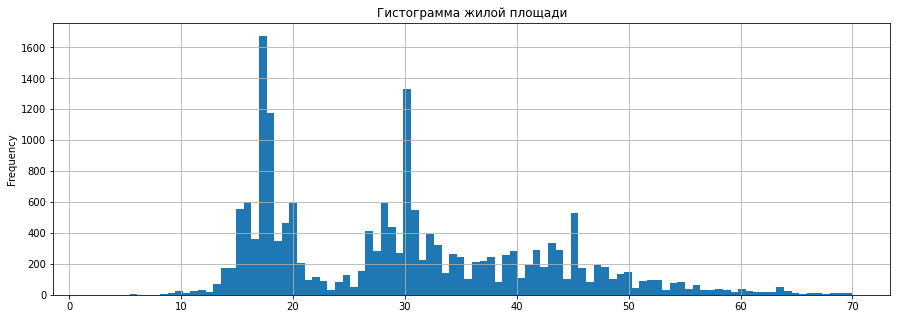

In [118]:
#data.plot(x='living_area',y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title='Зависимость между жилой и общей площадями')
data['living_area'].plot(kind='hist', figsize=(15,5), bins=100, grid=True, title='Гистограмма жилой площади');

Больше всего квартир с площадью 17 и 30 кв. метров

<AxesSubplot:title={'center':'Гистограмма общей площади'}, ylabel='Frequency'>

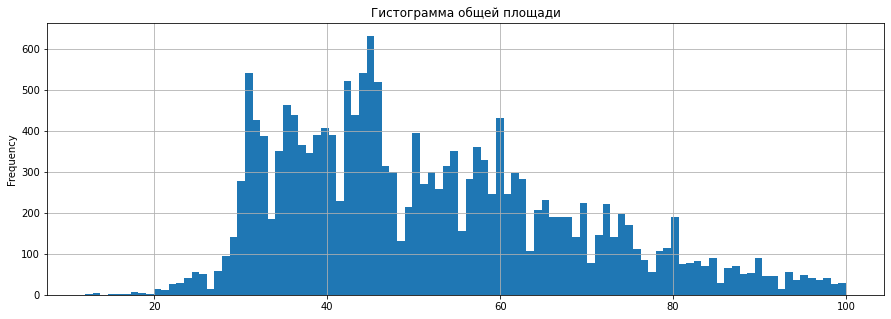

In [119]:
data['total_area'].plot(kind='hist', figsize=(15,5), bins=100, grid=True, title='Гистограмма общей площади')

Больше всего квартир с общей площадью 30-50 кв. метров

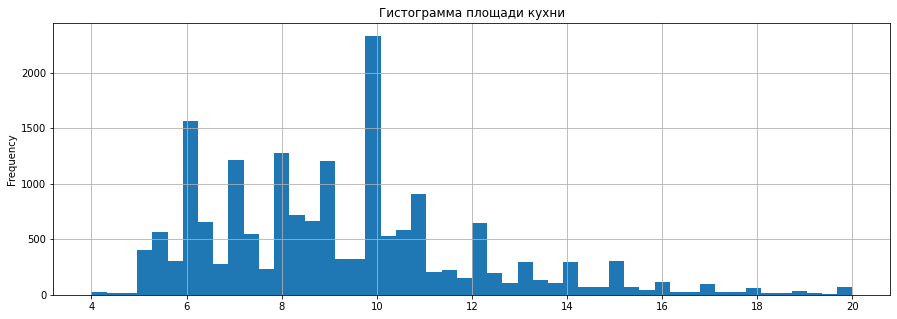

In [120]:
data['kitchen_area'].plot(kind='hist', figsize=(15,5), bins=50, grid=True, title='Гистограмма площади кухни');

Больше всего квартир с кухнями 6 - 10 кв. метров

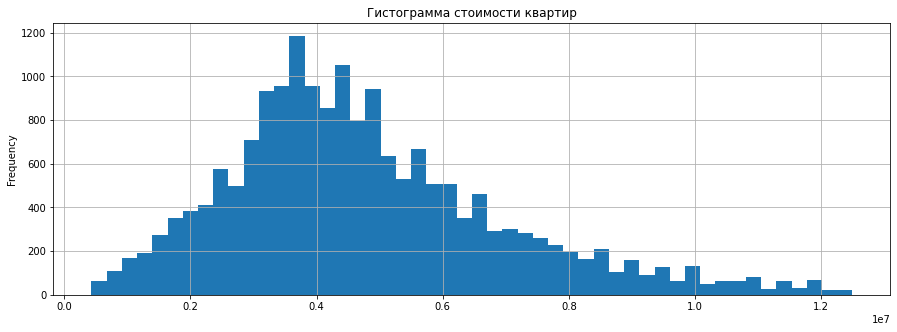

In [121]:
data['last_price'].plot(kind='hist', figsize=(15,5), bins=50, grid=True, title='Гистограмма стоимости квартир');

Больше всего квартир с ценой 3 - 3.5 млн руб.До 4 млн активный рост, после падение.

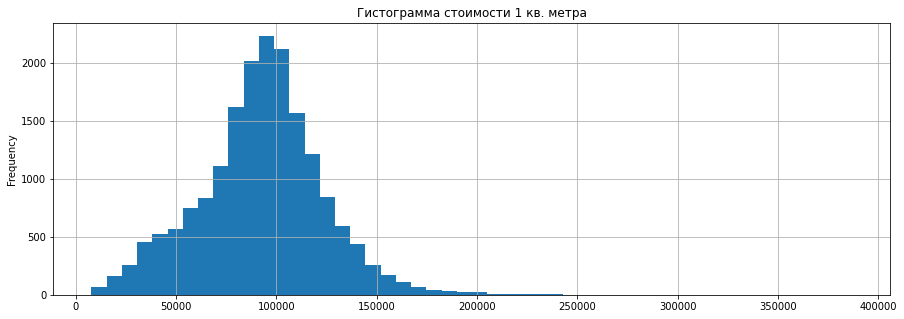

In [122]:
data['cost'].plot(kind='hist', figsize=(15,5), bins=50, grid=True, title='Гистограмма стоимости 1 кв. метра');

Больше всего квартир с ценой за 80 000 - 120 000 за 1 кв. метр

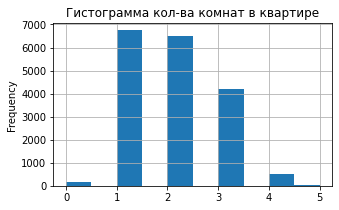

In [123]:
data['rooms'].plot(kind='hist', figsize=(5,3), bins=10, grid=True, title='Гистограмма кол-ва комнат в квартире');

Больше всего однокомнатных и двухкомнатных квартир. Чем больше комнат - тем меньше объявлений

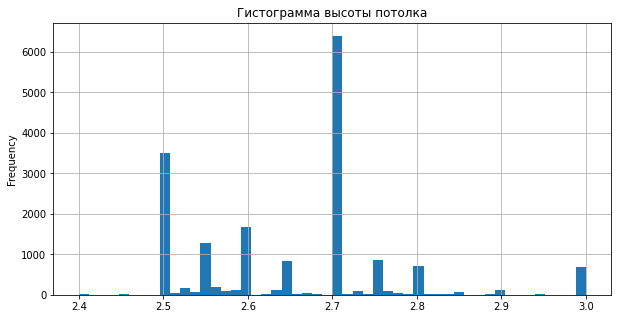

In [124]:
data['ceiling_height'].plot(kind='hist', figsize=(10,5), bins=50, grid=True, range=(2.4,3), title='Гистограмма высоты потолка');

Больше всего квартир с потолками 2.5-2.7

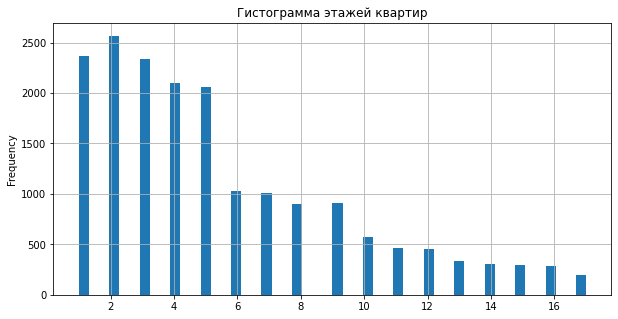

In [125]:
data['floor'].plot(kind='hist', figsize=(10,5), bins=50, grid=True, title='Гистограмма этажей квартир');

Больше всего квартир продается на 1-5 этажах.Макчимальное количество объявлений на 2 этаже. С 3 этажа наблюдается падение количества.

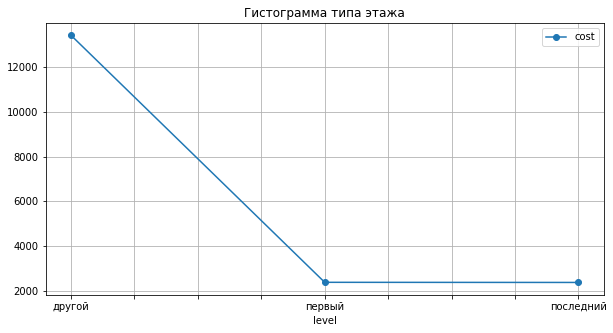

In [126]:
data.pivot_table(index='level', values='cost', aggfunc='count').plot(figsize=(10,5), grid=True, 
                                                                     title='Гистограмма типа этажа', style='o-');

Больше всего квартир продается на других этажах. Первых и последних примерно одинаково.

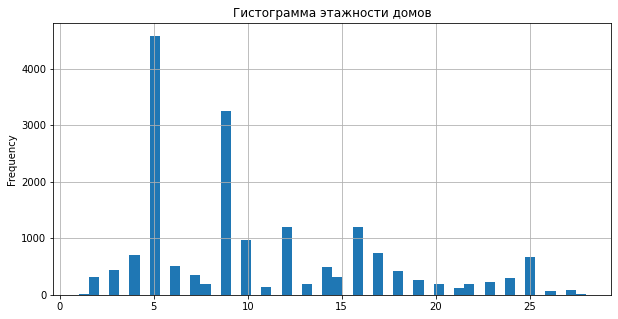

In [127]:
data['floors_total'].plot(kind='hist', figsize=(10,5), bins=50, grid=True, title='Гистограмма этажности домов');

Больше всего квартир продается в 5 и 9 этажных домах

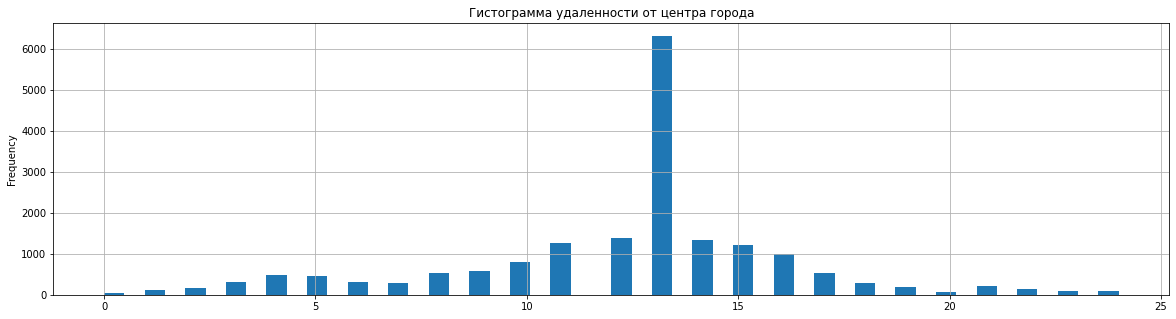

In [128]:
data['kilometre'].plot(kind='hist', figsize=(20,5), bins=50, grid=True, title='Гистограмма удаленности от центра города');

Больше всего квартир продается в отдалении от центра на расстоянии 8-17 км.

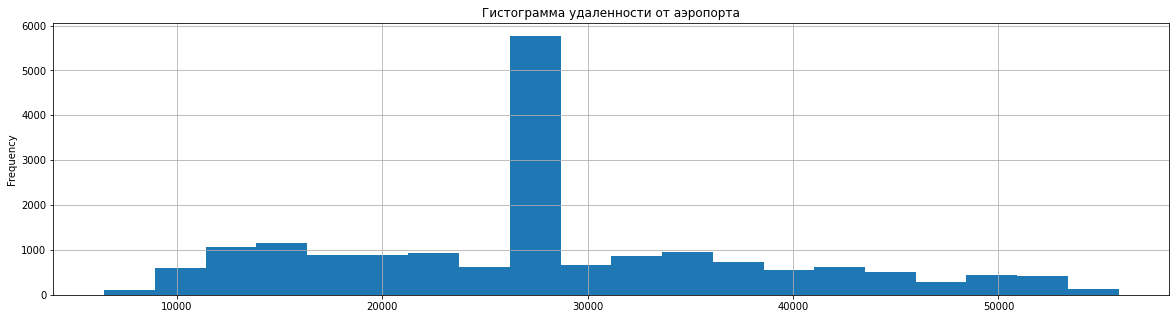

In [129]:
data['airports_nearest'].plot(kind='hist', figsize=(20,5), bins=20, grid=True, title='Гистограмма удаленности от аэропорта');

Основная часть домов расположена в 10-50 км от аэропорта

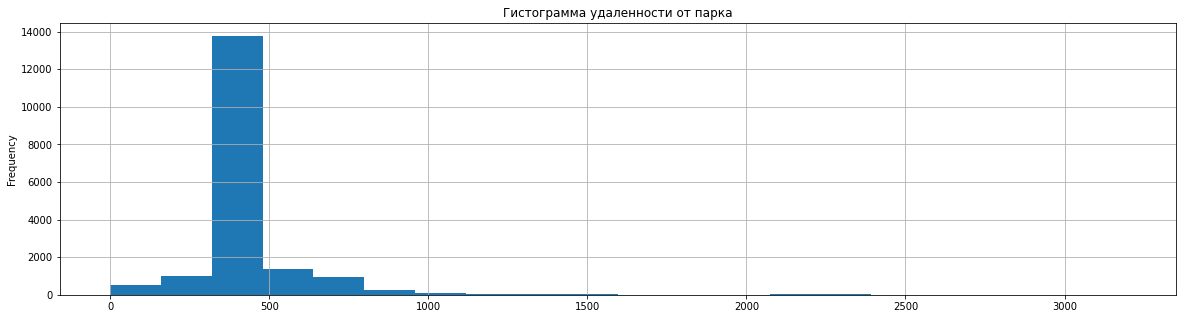

In [130]:
data['parks_nearest'].plot(kind='hist', figsize=(20,5), bins=20, grid=True, title='Гистограмма удаленности от парка');

Большая часть домов расположена в пределах 1 км от парка.

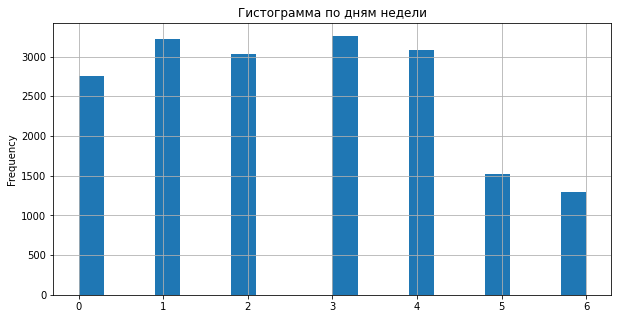

In [131]:
data['weekday'].plot(kind='hist', figsize=(10,5), bins=20, grid=True, title='Гистограмма по дням недели');

Большинство объявлений выложено в будни. Меньше всего в выходные.

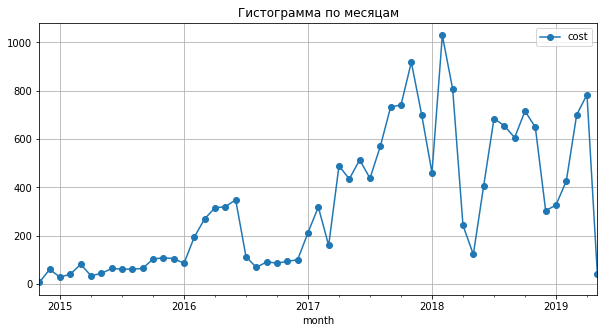

In [132]:
data.pivot_table(index='month', values='cost', aggfunc='count').plot(figsize=(10,5), grid=True, 
                                                                     title='Гистограмма по месяцам', style='o-');

2017 год - активный рост, 2018 май - резкое падение почти на 80%, 2019 - стабильный рост. После мая 2019 данные закончились.

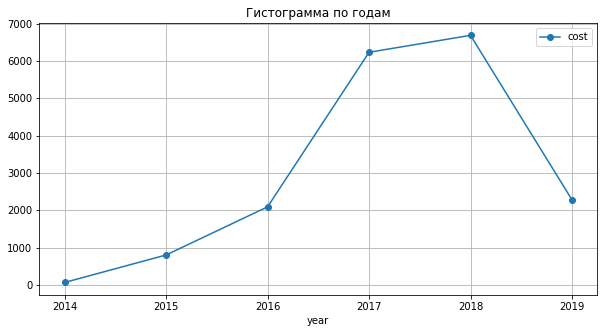

In [133]:
data.pivot_table(index='year', values='cost', aggfunc='count').plot(figsize=(10,5), grid=True, 
                                                                     title='Гистограмма по годам', style='o-');

2014 -2018 активный рост количества объявлений.

**Вывод:**
1. Больше всего квартир с площадью 17 и 30 кв. метров
2. Больше всего квартир с общей площадью 30-50 кв. метров
3. Больше всего квартир с кухнями 6 - 10 кв. метров
4. Больше всего квартир с ценой 3 - 3.5 млн руб. До 4 млн активный рост, после падение.
5. Больше всего однокомнатных и двухкомнатных квартир. Чем больше комнат - тем меньше объявлений
6. Больше всего квартир с потолками 2.5-2.7
7. Больше всего квартир продается на 1-5 этажах.Макчимальное количество объявлений на 2 этаже. С 3 этажа наблюдается падение количества.
8. Больше всего квартир продается на других этажах. Первых и последних примерно одинаково.
9. Больше всего квартир продается в 5 и 9 этажных домах
10. Больше всего квартир продается в отдалении от центра на расстоянии 8-17 км.
11. Основная часть домов расположена в 10-50 км от аэропорта
12. Большая часть домов расположена в пределах 1 км от парка.
13. Большинство объявлений выложено в будни. Меньше всего в выходные.
14. 2017 год - активный рост, 2018 май - резкое падение почти на 80%, 2019 - стабильный рост. После мая 2019 данные закончились.
15. 2014 -2018 активный рост количества объявлений.

#### Изучаем, как быстро продавались квартиры

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

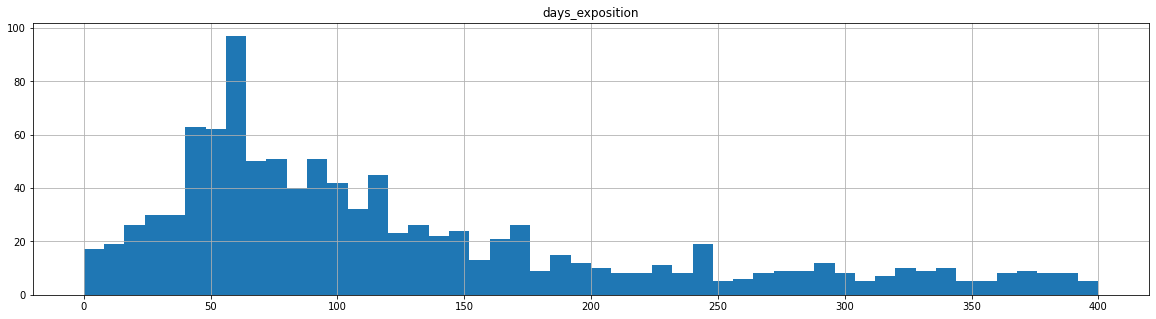

In [134]:
data.pivot_table(index='first_day_exposition', 
                 values='days_exposition', 
                 aggfunc='median').hist(
    bins=50,
    figsize=(20,5), 
    range=(0,400)
)


есть два скачка на 30 и 60 днях. Скорее всего, это срабавает система и объявление автоматически снимается с публикации.

count    15914.000000
mean       169.766558
std        208.686507
min          1.000000
25%         43.000000
50%         90.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

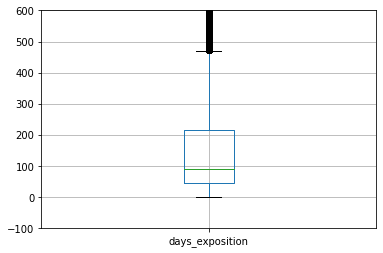

In [135]:
data.boxplot(column =['days_exposition'])
plt.ylim(-100, 600)
data['days_exposition'].describe()

среднее время продажи - 3 месяца

быстрые продажи до 1 месца

долгие продажи от 7 месяцев

#### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [136]:
# проверим корреляцию цены
corr_tab = data.corr().round(3)
corr_tab.query(' ((cost > 0.3) | (cost < -0.3)) & (cost != 1)')['cost'].sort_values(ascending=False)

last_price          0.668
floors_total        0.348
ponds_around3000    0.327
parks_around3000    0.307
kilometre          -0.302
Name: cost, dtype: float64

In [137]:
data.corr().round(2).loc[:, ['last_price']].sort_values(by='last_price', ascending=False).style.background_gradient(cmap='coolwarm')

,last_price
last_price,1.000000
cost,0.670000
total_area,0.670000
living_area,0.520000
kitchen_area,0.460000
rooms,0.400000
ceiling_height,0.380000
ponds_around3000,0.340000
parks_around3000,0.290000
floors_total,0.220000


Корреляция Пирсона составляет: 0.6744995861797352


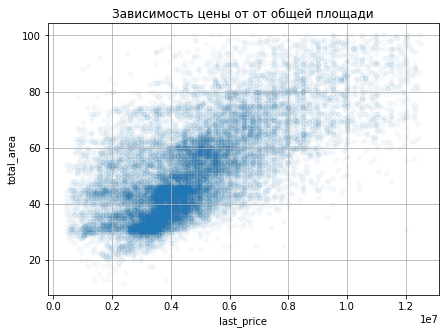

In [138]:
# проверяем зависимость цены от общей площади
#data.pivot_table(index='total_area', values='cost', aggfunc='median').hist(bins=100, figsize=(20,5))
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.03, title='Зависимость цены от от общей площади', figsize=(7,5), grid=True);
print('Корреляция Пирсона составляет:', data['total_area'].corr(data['last_price']))

Цена квартиры зависит от общей площади.Чем выше площадь квартиры, тем выше цена квартиры. Корреляция 0.67

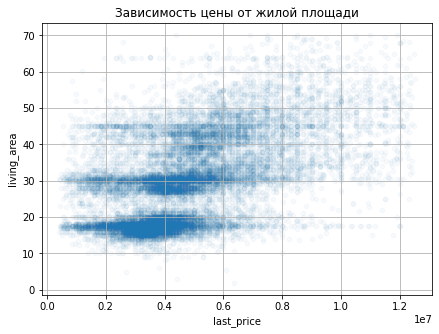

In [139]:
# проверяем зависимость цены от жилой площади
#data.pivot_table(index='living_area', values='cost', aggfunc='median').hist(bins=75, figsize=(20,5))
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.03, title='Зависимость цены от жилой площади', figsize=(7,5), grid=True);

Цена квартиры зависит от жилой площади. Чем больше жилая плозадь, тем выше цена.Корреляция 0.52

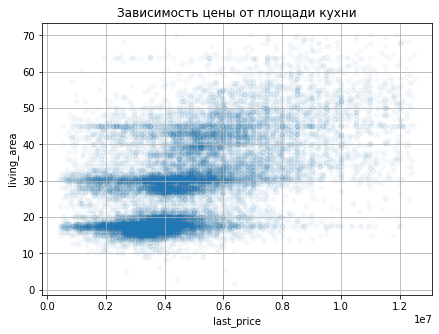

In [140]:
# проверяем зависимость цены от площади кухни
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.03,
          title='Зависимость цены от площади кухни', figsize=(7,5), grid=True);

Цена квартиры зависит от площади кухни. Чем больше площадь кухни, тем выше цена.Корреляция 0.46

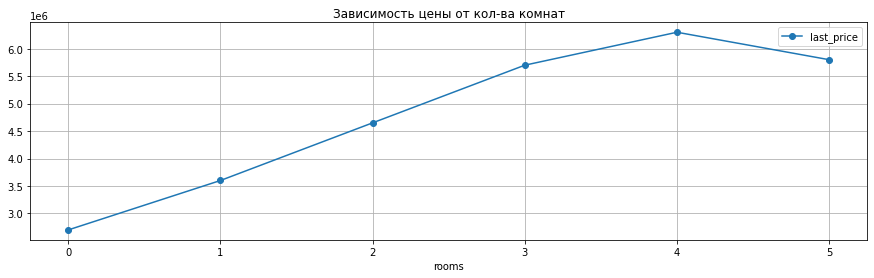

In [141]:
# проверяем зависимость цены от количества комнат
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(figsize=(15,4), grid=True, style='o-',
                                                                      title='Зависимость цены от кол-ва комнат');

Цена квартиры зависит отколичества комнат. Чем больше комнат, тем выше цена.

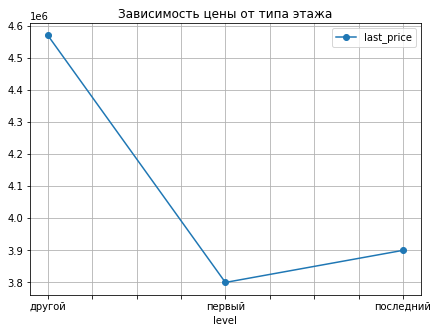

In [142]:
# проверяем зависимость цены от типа этажа
data.pivot_table(index='level', values='last_price', aggfunc='median').plot(figsize=(7,5), legend=True, style='o-', grid=True,
                                                                     title='Зависимость цены от типа этажа');

Квартиры на последнем этаже дороже чем на первом. Другие этажи сильно дороже первого и последнего

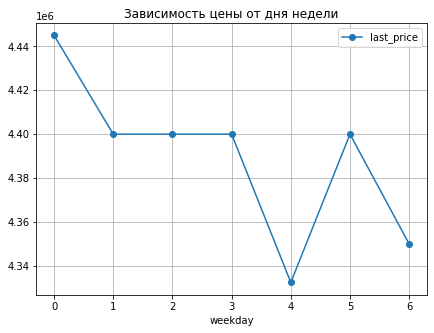

In [143]:
# проверяем зависимость цены от даты размещения (день недели)
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(figsize=(7,5), legend=True, style='o-', grid=True,
                                                                       title='Зависимость цены от дня недели');

максимальные цены по понедельникам, минимальные  по пятницам.

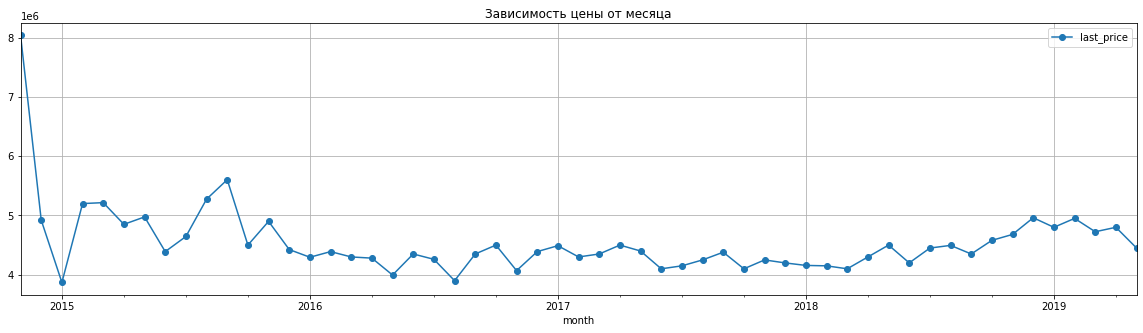

In [144]:
# проверяем зависимость цены от даты размещения (месяц)
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(figsize=(20,5), legend=True, style='o-', grid=True,
                                                                     title='Зависимость цены от месяца');

максимальные цены в мае - июне. 

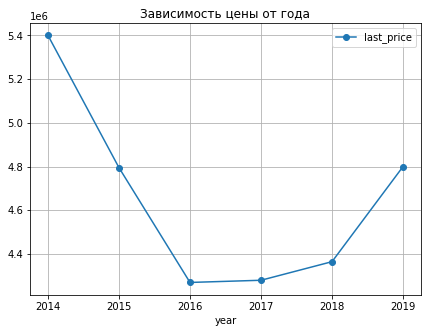

In [145]:
# проверяем зависимость цены от даты размещения (год)
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(figsize=(7,5), legend=True, style='o-', grid=True,
                                                                    title='Зависимость цены от года');

c 2014 по 2016 падение цен. С 2017 года год росла

**Выводы**
1. Цена квартиры зависит от общей площади.Чем выше площадь квартиры, тем выше цена квартиры. Корреляция 0.67
2. Цена квартиры зависит от жилой площади. Чем больше жилая плозадь, тем выше цена.Корреляция 0.52
3. Цена квартиры зависит от площади кухни. Чем больше площадь кухни, тем выше цена.Корреляция 0.46
4. Цена квартиры зависит отколичества комнат. Чем больше комнат, тем выше цена.
5. Квартиры на последнем этаже дороже чем на первом. Другие этажи сильно дороже первого и последнего
6. максимальные цены по понедельникам, минимальные  по пятницам.
7. максимальные цены в мае - июне. 
8. c 2014 по 2016 падение цен. С 2017 года год стабильный подъем

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

<AxesSubplot:ylabel='count'>

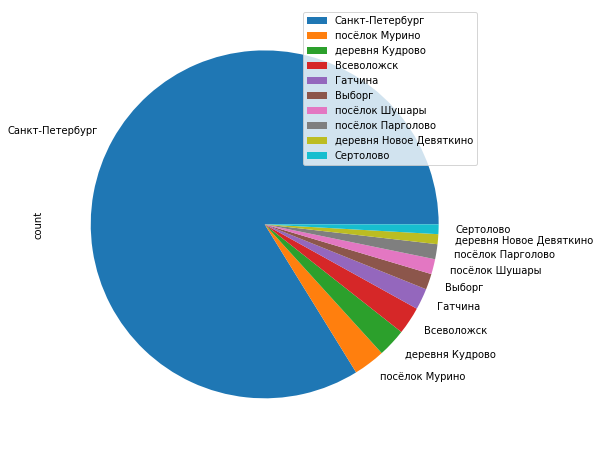

In [147]:
top_10 = data.pivot_table(index='locality_name', values='cost', aggfunc=['count', 'median'])
top_10.columns = ['count', 'median']
top_10 = top_10.query('count > 130').sort_values(by='count', ascending=False)
top_10.plot(y='count', kind='pie', figsize=(8,8))


In [148]:
top_10
#больше всего объявлений в СПБ

,count,median
locality_name,,
Санкт-Петербург,12565,102045.0
посёлок Мурино,440,85275.0
деревня Кудрово,396,96442.0
Всеволожск,384,65538.0
Гатчина,296,67745.5
Выборг,220,58133.0
посёлок Шушары,210,78989.5
посёлок Парголово,209,92051.0
деревня Новое Девяткино,138,74647.5


In [149]:
price_max = data.pivot_table(index='locality_name', values='cost', aggfunc='median')
price_max.sort_values(by='cost', ascending=False)
# в СПБ самые дорогие квартиры по цене за кв. метр

,cost
locality_name,
Санкт-Петербург,102045.0
Пушкин,98628.5
деревня Кудрово,96442.0
посёлок Парголово,92051.0
деревня Мистолово,90558.5
...,...
поселок Совхозный,12628.5
деревня Выскатка,12335.0
деревня Вахнова Кара,11688.0


In [150]:
price_min = data.pivot_table(index='locality_name', values='cost', aggfunc='median')
price_min.sort_values(by='cost', ascending=True)
# в деревне Старополье самые дешевые квартиры по цене за кв. метр

,cost
locality_name,
деревня Старополье,11000.0
посёлок станции Свирь,11481.0
деревня Вахнова Кара,11688.0
деревня Выскатка,12335.0
поселок Совхозный,12628.5
...,...
деревня Мистолово,90558.5
посёлок Парголово,92051.0
деревня Кудрово,96442.0


#### Квартиры в Санкт-Петербурге  и  средняя цена каждого километра.

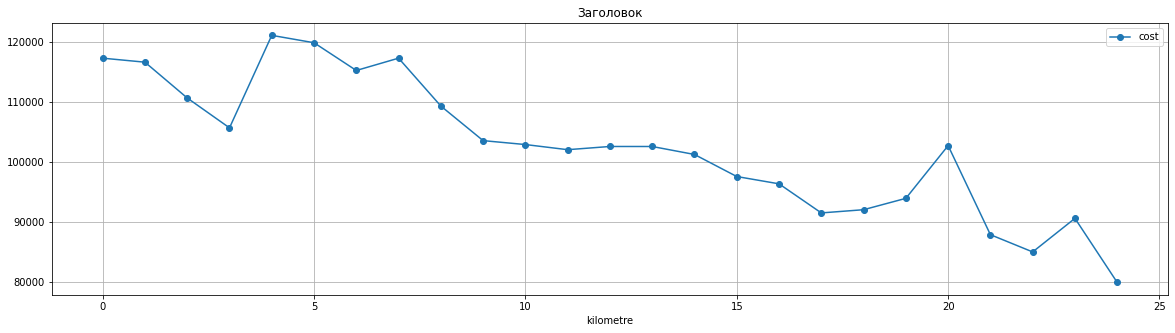

In [151]:
spb = data.query('locality_name == "Санкт-Петербург"')
spb = spb.pivot_table(index='kilometre', values='cost', aggfunc='median')
spb.plot(figsize=(20,5), grid=True, style='o-', title = 'Заголовок')
plt.show()

In [152]:
spb

,cost
kilometre,
0,117283.0
1,116613.5
2,110650.0
3,105673.0
4,121084.0
5,119852.0
6,115231.0
7,117283.0
8,109304.5


При отдалении от центра цена квартиры снижается, это хорошо виидно с 4 км. С 1 - 3 км падение цены. Максимальное значение цены на 4 км от центра.

### Общий вывод

**Проект по изучению рынка недвижимости в Санкт-Петербурге и его окрестностях**

**1. Первичный обзор датафрейма**

Открыли файл с данными, привели в читабельный вид для дальнейших исследований

**2. Предобработка данных**

 Нашли, изучили и заменили пропущенные значения на основе средних значений 
 
 Преобразовали данные в нужный тип
 
 Проанализировали уникальные значения в каждом столбце, устранили неявные дупликаты
 
 Изучили данные на предмет анамальных значений, удалили сильно выбивающиеся значения
 
 **3. Расширение диапозона исследования**
 
 Добавили столбцы с новыми параметрыми
 
 **4. Исследовательский анализ данных**
 
 Изучили каждый параметр с помощью построения гистограмм
 
 Изучили, как быстро продавались квартиры
 
 Нашли факторы, которые больше всего влиляют на цену квартир
 
 Посчитали среднюю цену одного квадрата в 10 крупных населенных пунктах
 
 Рассчитали средгюю цену каждого км от центра в Санкт-Петербурге 


**Возможные причины возникновения пропусков.**

Можно предположить. Продавцы намеренно не указывают некоторые параметры:
* высоту потолков 
* апартаменты это или нет 
* наличие балкона
* количество парков и водоемов по близости
* жилая площадь
* общая площадь
* площадь кухни
* расстояние до парка и водоема

Это делается для того, чтобы расширить охват возможных покупателей, или просто не считают их важными. Может, стоит сделать часть параметров обязательными. 

Часть данных генерируются автоматически:
* дата публикации
* расстоянии до аэропорта
* расстояние до центра города
* количество дней с момента публикации

Поэтому эти пропуски могли быть пропущены при записи данных. Стоит обратить на это внимание.

**Замена пропусков.**

Проанализировав данные, удалось найти аномальные значения с помощью диаграммы размаха. В столбцах "parks_nearest" и "ponds_nearest" было более 65% пропусков, поэтому невозможно определить анамалии. Пропущенные значения в столбцу "days_exposition" нечем заменить, поэтому некорректно было бы убирать анамалии.*

**Самые частые предложения c критериями:**

1. Больше всего квартир с площадью 17 и 30 кв. метров
2. Больше всего квартир с общей площадью 30-50 кв. метров
3. Больше всего квартир с кухнями 6 - 10 кв. метров
4. Больше всего квартир с ценой 3 - 3.5 млн руб. До 4 млн активный рост, после падение.
5. Больше всего однокомнатных и двухкомнатных квартир. Чем больше комнат - тем меньше объявлений
6. Больше всего квартир с потолками 2.5-2.7
7. Больше всего квартир продается на 1-5 этажах.Максимальное количество объявлений на 2 этаже. С 3 этажа наблюдается падение количества.
8. Больше всего квартир продается на других этажах. Первых и последних примерно одинаково.
9. Больше всего квартир продается в 5 и 9 этажных домах
10. Больше всего квартир продается в отдалении от центра на расстоянии 8-17 км.
11. Основная часть домов расположена в 10-50 км от аэропорта
12. Большая часть домов расположена в пределах 1 км от парка.
13. Большинство объявлений выложено в будни. Меньше всего в выходные.
14. 2017 год - активный рост, 2018 май - резкое падение почти на 80%, 2019 - стабильный рост. После мая 2019 данные закончились.
15. 2014 -2018 активный рост количества объявлений.

**Как быстро продавались квартиры.**

Есть два скачка на 30 и 60 днях. Скорее всего, это срабавает система и объявление автоматически снимается с публикации.
Среднее время продажи - 3 месяца, быстрые продажи до 1 месца, долгие продажи от 7 месяцев.

**Факторы, которые больше всего влияют на общую (полную) стоимость объекта.**

1. Цена квартиры зависит от общей площади.Чем выше площадь квартиры, тем выше цена квартиры. Корреляция 0.67
2. Цена квартиры зависит от жилой площади. Чем больше жилая плозадь, тем выше цена.Корреляция 0.52
3. Цена квартиры зависит от площади кухни. Чем больше площадь кухни, тем выше цена.Корреляция 0.46
4. Цена квартиры зависит отколичества комнат. Чем больше комнат, тем выше цена.
5. Квартиры на последнем этаже дороже чем на первом. Другие этажи сильно дороже первого и последнего
6. Максимальные цены по понедельникам, минимальные  по пятницам.
7. Максимальные цены в мае - июне. 
8. С 2014 по 2016 падение цен. С 2017 года год стабильный подъем

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

1. Санкт-Петербург	     12 565 шт.    102 045 руб
2. посёлок Мурино	        440 шт. 	85 275 руб
3. деревня Кудрово	        396 шт. 	96 442 руб
4. Всеволожск	            384 шт.	    65 538 руб
5. Гатчина	                296	шт.     67 745 руб
6. Выборг	                220 шт.  	58 133 руб
7. посёлок Шушары	        210 шт. 	78 989 руб
8. посёлок Парголово	    209	шт.     92 051 руб
9. деревня Новое Девяткино	138	шт.     74 647 руб
10. Сертолово	            135	шт.     67 529 руб

Самые дорогие квартиры в Санкт-Петербурге - 102 045 руб за кв. метр

Самые дешевые квартиры в деревне Старополье - 11000 руб за кв. метр

**Квартиры в Санкт-Петербурге и средняя цена каждого километра.**

При отдалении от центра цена квартиры снижается, это хорошо видно с 4 км. С 1 - 3 км отмечается падение цены, но после него выход на максимальную цену на 4 км от центра.

0.	117 283 руб
1.	116 613 руб
2.	110 650 руб
3.	105 673 руб
4.	121 084 руб 
5.	119 852 руб
6.	115 231 руб
7.	117 283 руб
8.	109 304 руб
9.	103 542 руб
10.	102 888 руб